In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Step 2: Set dataset paths
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
# Step 3: Preprocess the data and resize all images
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,                                               
    image_size=(img_height,img_width),                                                   
    batch_size=32,                                                    
    shuffle=False,                                               
    validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


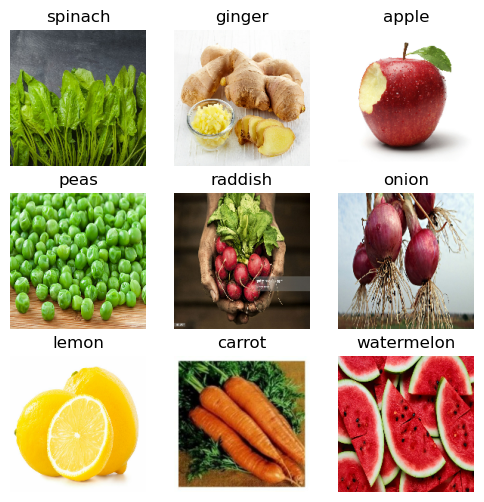

In [75]:
plt.figure(figsize=(6,6))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='relu'))

/Users/pawannath/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#with Padding
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1) ))
model.add(Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Conv2D(8,kernel_size=(3,3), padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │       125,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,774 (514.74 KB)

 Trainable params: 131,774 (514.74 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import layers
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [76]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,979,854 (45.70 MB)

 Trainable params: 3,993,284 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,986,570 (30.47 MB)

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10


2024-11-18 21:02:44.607190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step - accuracy: 0.0020 - loss: 7.6615    

2024-11-18 21:02:46.055129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.0066 - loss: 7.7848

2024-11-18 21:02:46.342380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 25s 288ms/step - accuracy: 0.0184 - loss: 7.2644

2024-11-18 21:02:47.797675: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:02:47.823252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 23s 280ms/step - accuracy: 0.0223 - loss: 6.8895

2024-11-18 21:02:48.340399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 22s 269ms/step - accuracy: 0.0261 - loss: 6.5768

2024-11-18 21:02:49.227132: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 20s 270ms/step - accuracy: 0.0294 - loss: 6.1039

2024-11-18 21:02:50.897462: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.0302 - loss: 5.9222

2024-11-18 21:02:51.416384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.0320 - loss: 5.5898

2024-11-18 21:02:53.269655: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 16s 267ms/step - accuracy: 0.0328 - loss: 5.4757

2024-11-18 21:02:54.056661: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 16s 275ms/step - accuracy: 0.0342 - loss: 5.3418

2024-11-18 21:02:55.630188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step - accuracy: 0.0405 - loss: 4.9460

2024-11-18 21:02:59.735543: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step - accuracy: 0.0408 - loss: 4.9266

2024-11-18 21:03:00.009056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - accuracy: 0.0457 - loss: 4.6961

2024-11-18 21:03:03.372092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


73/98 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.0468 - loss: 4.6548

2024-11-18 21:03:04.197231: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 0.0479 - loss: 4.6156

2024-11-18 21:03:04.756949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 0.0490 - loss: 4.5782

2024-11-18 21:03:05.816855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.0498 - loss: 4.5542

2024-11-18 21:03:06.145302: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:06.348356: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.0514 - loss: 4.5088

2024-11-18 21:03:07.210179: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.0530 - loss: 4.4661

2024-11-18 21:03:08.259269: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:08.282360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.0568 - loss: 4.3791

2024-11-18 21:03:11.199449: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:11.679512: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.0573 - loss: 4.3702 - val_accuracy: 0.2963 - val_loss: 2.5532
Epoch 2/10
 2/98 ━━━━━━━━━━━━━━━━━━━━ 40s 425ms/step - accuracy: 0.2031 - loss: 2.8772

2024-11-18 21:03:13.301159: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 33s 351ms/step - accuracy: 0.2122 - loss: 2.8788

2024-11-18 21:03:13.886607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:13.995241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 30s 334ms/step - accuracy: 0.2191 - loss: 2.8475

2024-11-18 21:03:14.653945: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 27s 305ms/step - accuracy: 0.2252 - loss: 2.8322

2024-11-18 21:03:15.192773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:15.381683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - accuracy: 0.2241 - loss: 2.8208

2024-11-18 21:03:16.603564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:16.696959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 275ms/step - accuracy: 0.2235 - loss: 2.7873

2024-11-18 21:03:19.844605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.2271 - loss: 2.7645

2024-11-18 21:03:22.580142: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


38/98 ━━━━━━━━━━━━━━━━━━━━ 16s 276ms/step - accuracy: 0.2283 - loss: 2.7591

2024-11-18 21:03:23.182877: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


48/98 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.2341 - loss: 2.7304

2024-11-18 21:03:25.955580: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 12s 277ms/step - accuracy: 0.2368 - loss: 2.7181

2024-11-18 21:03:27.094187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.2408 - loss: 2.6975

2024-11-18 21:03:30.003778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:30.084455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 8s 276ms/step - accuracy: 0.2430 - loss: 2.6852

2024-11-18 21:03:31.748528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.2457 - loss: 2.6723

2024-11-18 21:03:33.565279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.2471 - loss: 2.6661

2024-11-18 21:03:34.363760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - accuracy: 0.2487 - loss: 2.6580

2024-11-18 21:03:35.480496: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.2496 - loss: 2.6540

2024-11-18 21:03:36.002994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.2504 - loss: 2.6502

2024-11-18 21:03:36.537153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.2516 - loss: 2.6445

2024-11-18 21:03:37.330727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


92/98 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - accuracy: 0.2528 - loss: 2.6391

2024-11-18 21:03:37.854632: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.2551 - loss: 2.6288

2024-11-18 21:03:39.954188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:40.305346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.2555 - loss: 2.6271 - val_accuracy: 0.5556 - val_loss: 1.6975
Epoch 3/10


2024-11-18 21:03:41.193177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:41.364863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:41.479229: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 25s 282ms/step - accuracy: 0.3194 - loss: 2.3987

2024-11-18 21:03:43.540347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/98 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.3240 - loss: 2.3823

2024-11-18 21:03:44.035870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.3418 - loss: 2.3151

2024-11-18 21:03:45.109314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 272ms/step - accuracy: 0.3665 - loss: 2.2359

2024-11-18 21:03:46.947428: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 17s 267ms/step - accuracy: 0.3847 - loss: 2.1756

2024-11-18 21:03:49.852212: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:50.034181: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:03:50.070317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.3863 - loss: 2.1703

2024-11-18 21:03:50.678345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 15s 275ms/step - accuracy: 0.3928 - loss: 2.1480

2024-11-18 21:03:53.126011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


55/98 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.4011 - loss: 2.1184

2024-11-18 21:03:56.745729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 278ms/step - accuracy: 0.4028 - loss: 2.1122

2024-11-18 21:03:57.620701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


70/98 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.4091 - loss: 2.0884

2024-11-18 21:04:01.086007: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.4117 - loss: 2.0788

2024-11-18 21:04:02.491778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - accuracy: 0.4122 - loss: 2.0769

2024-11-18 21:04:02.758151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.4132 - loss: 2.0732

2024-11-18 21:04:03.404128: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 281ms/step - accuracy: 0.4142 - loss: 2.0695

2024-11-18 21:04:03.930787: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:03.983165: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.4163 - loss: 2.0622

2024-11-18 21:04:05.076422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


87/98 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.4178 - loss: 2.0567

2024-11-18 21:04:05.931210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.4199 - loss: 2.0492

2024-11-18 21:04:07.006602: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4232 - loss: 2.0369

2024-11-18 21:04:10.066806: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:10.460101: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.4237 - loss: 2.0352 - val_accuracy: 0.7863 - val_loss: 0.9507
Epoch 4/10


2024-11-18 21:04:11.349892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:11.432283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:11.747058: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/98 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - accuracy: 0.5944 - loss: 1.3750

2024-11-18 21:04:13.483639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.5880 - loss: 1.4112

2024-11-18 21:04:14.570455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 23s 279ms/step - accuracy: 0.5898 - loss: 1.4082

2024-11-18 21:04:15.677757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 22s 284ms/step - accuracy: 0.5932 - loss: 1.4036

2024-11-18 21:04:16.895274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - accuracy: 0.5967 - loss: 1.3906

2024-11-18 21:04:20.335460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 286ms/step - accuracy: 0.5970 - loss: 1.3869

2024-11-18 21:04:21.768757: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 288ms/step - accuracy: 0.5973 - loss: 1.3857

2024-11-18 21:04:22.152922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.6004 - loss: 1.3742

2024-11-18 21:04:25.754167: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


50/98 ━━━━━━━━━━━━━━━━━━━━ 14s 298ms/step - accuracy: 0.6012 - loss: 1.3714

2024-11-18 21:04:26.443221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


52/98 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - accuracy: 0.6017 - loss: 1.3693

2024-11-18 21:04:27.127209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - accuracy: 0.6031 - loss: 1.3648

2024-11-18 21:04:28.878502: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 9s 295ms/step - accuracy: 0.6043 - loss: 1.3618

2024-11-18 21:04:31.202011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - accuracy: 0.6057 - loss: 1.3575

2024-11-18 21:04:33.500759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:33.792869: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.6062 - loss: 1.3562

2024-11-18 21:04:34.299138: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.6069 - loss: 1.3541

2024-11-18 21:04:35.402797: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:35.549855: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - accuracy: 0.6071 - loss: 1.3533

2024-11-18 21:04:35.822177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.6076 - loss: 1.3518

2024-11-18 21:04:36.141848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.6082 - loss: 1.3501

2024-11-18 21:04:36.899346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.6123 - loss: 1.3365

2024-11-18 21:04:40.875690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:41.222959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.6126 - loss: 1.3354 - val_accuracy: 0.8205 - val_loss: 0.6812
Epoch 5/10


2024-11-18 21:04:42.304566: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:42.561528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/98 ━━━━━━━━━━━━━━━━━━━━ 32s 341ms/step - accuracy: 0.6732 - loss: 1.0207

2024-11-18 21:04:43.952615: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:04:44.007952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - accuracy: 0.7090 - loss: 0.9442

2024-11-18 21:04:45.803422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 24s 292ms/step - accuracy: 0.7124 - loss: 0.9349

2024-11-18 21:04:46.302528: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 294ms/step - accuracy: 0.7138 - loss: 0.9322

2024-11-18 21:04:46.667218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/98 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - accuracy: 0.7157 - loss: 0.9285

2024-11-18 21:04:47.015107: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 22s 291ms/step - accuracy: 0.7202 - loss: 0.9237

2024-11-18 21:04:48.906439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.7229 - loss: 0.9238

2024-11-18 21:04:51.362654: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.7241 - loss: 0.9229

2024-11-18 21:04:52.239374: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.7257 - loss: 0.9205

2024-11-18 21:04:53.005777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


56/98 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.7301 - loss: 0.9064

2024-11-18 21:04:58.990637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


59/98 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.7305 - loss: 0.9042

2024-11-18 21:04:59.709692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.7315 - loss: 0.8990

2024-11-18 21:05:01.535708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 8s 292ms/step - accuracy: 0.7320 - loss: 0.8966

2024-11-18 21:05:02.685870: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.7337 - loss: 0.8902

2024-11-18 21:05:04.458023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:04.686114: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.7351 - loss: 0.8849

2024-11-18 21:05:05.970819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:06.116875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.7361 - loss: 0.8815

2024-11-18 21:05:06.852023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


88/98 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.7374 - loss: 0.8769

2024-11-18 21:05:08.166591: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


89/98 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.7378 - loss: 0.8757

2024-11-18 21:05:08.461913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.7409 - loss: 0.8649

2024-11-18 21:05:11.214666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:11.591704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 307ms/step - accuracy: 0.7413 - loss: 0.8637 - val_accuracy: 0.8946 - val_loss: 0.4355
Epoch 6/10


2024-11-18 21:05:12.767880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:12.772754: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 55s 574ms/step - accuracy: 0.8438 - loss: 0.4627

2024-11-18 21:05:13.072438: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 28s 309ms/step - accuracy: 0.8646 - loss: 0.4205

2024-11-18 21:05:14.352111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:14.498125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 8/98 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.8568 - loss: 0.4443

2024-11-18 21:05:15.284318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 24s 297ms/step - accuracy: 0.8542 - loss: 0.4707

2024-11-18 21:05:16.783085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/98 ━━━━━━━━━━━━━━━━━━━━ 22s 298ms/step - accuracy: 0.8589 - loss: 0.4716

2024-11-18 21:05:19.157497: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.8603 - loss: 0.4702

2024-11-18 21:05:20.065008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.8622 - loss: 0.4693

2024-11-18 21:05:22.940551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:23.016951: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.8625 - loss: 0.4691

2024-11-18 21:05:23.523040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 14s 296ms/step - accuracy: 0.8635 - loss: 0.4678

2024-11-18 21:05:27.441311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 13s 297ms/step - accuracy: 0.8639 - loss: 0.4668

2024-11-18 21:05:28.380949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 8s 296ms/step - accuracy: 0.8657 - loss: 0.4636

2024-11-18 21:05:33.318545: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.8667 - loss: 0.4620

2024-11-18 21:05:35.581981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.8672 - loss: 0.4615

2024-11-18 21:05:36.661158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.8674 - loss: 0.4613

2024-11-18 21:05:37.129695: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.8676 - loss: 0.4610

2024-11-18 21:05:37.694874: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.8679 - loss: 0.4607

2024-11-18 21:05:38.362831: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.8680 - loss: 0.4605

2024-11-18 21:05:38.738403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


91/98 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.8685 - loss: 0.4597

2024-11-18 21:05:40.126346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:40.129638: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8695 - loss: 0.4579

2024-11-18 21:05:42.383144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:42.810210: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 315ms/step - accuracy: 0.8696 - loss: 0.4577 - val_accuracy: 0.9288 - val_loss: 0.4598
Epoch 7/10


2024-11-18 21:05:44.016383: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 35s 367ms/step - accuracy: 0.8906 - loss: 0.3783

2024-11-18 21:05:44.771532: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:05:44.965501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/98 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.8836 - loss: 0.3463

2024-11-18 21:05:46.959703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 24s 290ms/step - accuracy: 0.8859 - loss: 0.3416

2024-11-18 21:05:47.811087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/98 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.8903 - loss: 0.3331

2024-11-18 21:05:48.820959: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - accuracy: 0.8931 - loss: 0.3287

2024-11-18 21:05:49.597863: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 292ms/step - accuracy: 0.8966 - loss: 0.3285

2024-11-18 21:05:51.322834: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/98 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9007 - loss: 0.3276

2024-11-18 21:05:53.697283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9012 - loss: 0.3271

2024-11-18 21:05:53.978102: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.9017 - loss: 0.3267

2024-11-18 21:05:54.225300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - accuracy: 0.9055 - loss: 0.3221

2024-11-18 21:05:57.853897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


53/98 ━━━━━━━━━━━━━━━━━━━━ 13s 296ms/step - accuracy: 0.9070 - loss: 0.3204

2024-11-18 21:05:59.493843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


57/98 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.9079 - loss: 0.3198

2024-11-18 21:06:00.816317: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.9088 - loss: 0.3189

2024-11-18 21:06:01.749198: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


72/98 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.9108 - loss: 0.3157

2024-11-18 21:06:05.378299: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.9115 - loss: 0.3144

2024-11-18 21:06:06.707155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.9118 - loss: 0.3138

2024-11-18 21:06:07.371992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.9120 - loss: 0.3135

2024-11-18 21:06:07.730862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.9127 - loss: 0.3123

2024-11-18 21:06:08.872040: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


84/98 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.9128 - loss: 0.3120

2024-11-18 21:06:09.199692: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.9131 - loss: 0.3114

2024-11-18 21:06:09.710283: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:09.742393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9149 - loss: 0.3078

2024-11-18 21:06:13.675726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:14.066205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 317ms/step - accuracy: 0.9151 - loss: 0.3075 - val_accuracy: 0.9345 - val_loss: 0.3249
Epoch 8/10


2024-11-18 21:06:15.209071: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:15.252539: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/98 ━━━━━━━━━━━━━━━━━━━━ 30s 317ms/step - accuracy: 0.9062 - loss: 0.2791 

2024-11-18 21:06:15.948927: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/98 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - accuracy: 0.9186 - loss: 0.2531

2024-11-18 21:06:18.709076: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/98 ━━━━━━━━━━━━━━━━━━━━ 25s 302ms/step - accuracy: 0.9184 - loss: 0.2526

2024-11-18 21:06:19.063803: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


14/98 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - accuracy: 0.9179 - loss: 0.2540

2024-11-18 21:06:19.346535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:19.548387: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9179 - loss: 0.2586

2024-11-18 21:06:22.370004: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/98 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - accuracy: 0.9179 - loss: 0.2586

2024-11-18 21:06:22.698485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/98 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.9188 - loss: 0.2581

2024-11-18 21:06:25.301965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


39/98 ━━━━━━━━━━━━━━━━━━━━ 17s 294ms/step - accuracy: 0.9192 - loss: 0.2580

2024-11-18 21:06:26.856760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


43/98 ━━━━━━━━━━━━━━━━━━━━ 16s 294ms/step - accuracy: 0.9195 - loss: 0.2577

2024-11-18 21:06:27.970321: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


49/98 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 0.9199 - loss: 0.2591

2024-11-18 21:06:30.082306: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 11s 299ms/step - accuracy: 0.9211 - loss: 0.2633

2024-11-18 21:06:33.373311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


66/98 ━━━━━━━━━━━━━━━━━━━━ 9s 300ms/step - accuracy: 0.9215 - loss: 0.2643

2024-11-18 21:06:35.115656: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


69/98 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - accuracy: 0.9218 - loss: 0.2649

2024-11-18 21:06:35.969639: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.9219 - loss: 0.2653

2024-11-18 21:06:36.680683: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.9222 - loss: 0.2662

2024-11-18 21:06:37.788233: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.9222 - loss: 0.2664

2024-11-18 21:06:38.242337: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


79/98 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.9224 - loss: 0.2669

2024-11-18 21:06:39.573005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:39.650089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.9224 - loss: 0.2671

2024-11-18 21:06:39.820573: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


82/98 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.9226 - loss: 0.2673

2024-11-18 21:06:40.423174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9238 - loss: 0.2667

2024-11-18 21:06:45.857324: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:46.222868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 328ms/step - accuracy: 0.9239 - loss: 0.2666 - val_accuracy: 0.9402 - val_loss: 0.3583
Epoch 9/10


2024-11-18 21:06:47.708418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:06:47.795518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/98 ━━━━━━━━━━━━━━━━━━━━ 57s 591ms/step - accuracy: 0.9688 - loss: 0.1047

2024-11-18 21:06:47.987319: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 33s 361ms/step - accuracy: 0.9736 - loss: 0.1239

2024-11-18 21:06:49.303929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 28s 334ms/step - accuracy: 0.9706 - loss: 0.1505

2024-11-18 21:06:51.668092: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/98 ━━━━━━━━━━━━━━━━━━━━ 26s 327ms/step - accuracy: 0.9673 - loss: 0.1576

2024-11-18 21:06:52.898384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/98 ━━━━━━━━━━━━━━━━━━━━ 25s 324ms/step - accuracy: 0.9656 - loss: 0.1625

2024-11-18 21:06:53.554475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/98 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - accuracy: 0.9644 - loss: 0.1656

2024-11-18 21:06:54.077987: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 23s 326ms/step - accuracy: 0.9625 - loss: 0.1690

2024-11-18 21:06:56.159061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/98 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - accuracy: 0.9611 - loss: 0.1710

2024-11-18 21:06:57.835622: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


34/98 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.9608 - loss: 0.1712

2024-11-18 21:06:58.477923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 19s 316ms/step - accuracy: 0.9606 - loss: 0.1716

2024-11-18 21:06:59.068230: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


47/98 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step - accuracy: 0.9593 - loss: 0.1747

2024-11-18 21:07:02.176060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


51/98 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.9590 - loss: 0.1759

2024-11-18 21:07:03.814592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


67/98 ━━━━━━━━━━━━━━━━━━━━ 9s 310ms/step - accuracy: 0.9579 - loss: 0.1803

2024-11-18 21:07:08.478691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.9578 - loss: 0.1807

2024-11-18 21:07:09.637835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


74/98 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.9578 - loss: 0.1807

2024-11-18 21:07:10.658800: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


76/98 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 0.9578 - loss: 0.1807

2024-11-18 21:07:11.225719: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


80/98 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.9578 - loss: 0.1806

2024-11-18 21:07:12.449352: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.9579 - loss: 0.1802

2024-11-18 21:07:13.927460: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


86/98 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - accuracy: 0.9579 - loss: 0.1801

2024-11-18 21:07:14.181553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:07:14.199783: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.9579 - loss: 0.1798

2024-11-18 21:07:15.280025: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9582 - loss: 0.1788

2024-11-18 21:07:17.859915: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:07:18.248627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 321ms/step - accuracy: 0.9582 - loss: 0.1787 - val_accuracy: 0.9516 - val_loss: 0.3073
Epoch 10/10


2024-11-18 21:07:19.246744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/98 ━━━━━━━━━━━━━━━━━━━━ 28s 311ms/step - accuracy: 0.9839 - loss: 0.1159

2024-11-18 21:07:20.954677: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/98 ━━━━━━━━━━━━━━━━━━━━ 26s 293ms/step - accuracy: 0.9816 - loss: 0.1220

2024-11-18 21:07:21.434427: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/98 ━━━━━━━━━━━━━━━━━━━━ 23s 278ms/step - accuracy: 0.9784 - loss: 0.1231

2024-11-18 21:07:22.733628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/98 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - accuracy: 0.9762 - loss: 0.1242

2024-11-18 21:07:25.441506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/98 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.9759 - loss: 0.1236

2024-11-18 21:07:26.000684: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:07:26.020935: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/98 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.9756 - loss: 0.1228

2024-11-18 21:07:26.498393: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/98 ━━━━━━━━━━━━━━━━━━━━ 18s 277ms/step - accuracy: 0.9751 - loss: 0.1254

2024-11-18 21:07:27.743313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


36/98 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - accuracy: 0.9751 - loss: 0.1262

2024-11-18 21:07:29.505035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


37/98 ━━━━━━━━━━━━━━━━━━━━ 17s 281ms/step - accuracy: 0.9751 - loss: 0.1262

2024-11-18 21:07:29.855248: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


42/98 ━━━━━━━━━━━━━━━━━━━━ 16s 286ms/step - accuracy: 0.9751 - loss: 0.1263

2024-11-18 21:07:31.423606: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


58/98 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - accuracy: 0.9750 - loss: 0.1277

2024-11-18 21:07:35.703122: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


61/98 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.9750 - loss: 0.1279

2024-11-18 21:07:37.013690: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


63/98 ━━━━━━━━━━━━━━━━━━━━ 10s 289ms/step - accuracy: 0.9749 - loss: 0.1282

2024-11-18 21:07:37.437730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


68/98 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.9749 - loss: 0.1290

2024-11-18 21:07:39.111981: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


71/98 ━━━━━━━━━━━━━━━━━━━━ 7s 292ms/step - accuracy: 0.9749 - loss: 0.1296

2024-11-18 21:07:39.922576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


75/98 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.9749 - loss: 0.1302

2024-11-18 21:07:41.478642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


78/98 ━━━━━━━━━━━━━━━━━━━━ 5s 294ms/step - accuracy: 0.9749 - loss: 0.1306

2024-11-18 21:07:42.398255: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


81/98 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.9749 - loss: 0.1308

2024-11-18 21:07:43.302976: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


83/98 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.9749 - loss: 0.1309

2024-11-18 21:07:43.912930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


85/98 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.9749 - loss: 0.1310

2024-11-18 21:07:44.554645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


90/98 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.9750 - loss: 0.1310

2024-11-18 21:07:45.896419: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.9751 - loss: 0.1308

2024-11-18 21:07:48.612942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-18 21:07:48.971224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


98/98 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.9751 - loss: 0.1307 - val_accuracy: 0.9573 - val_loss: 0.3503


Text(0.5, 1.0, 'Loss')

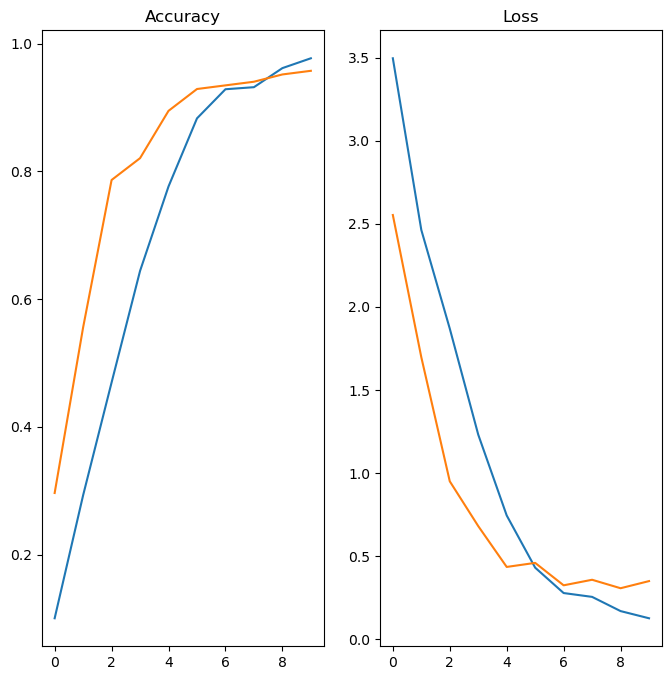

In [23]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [33]:
# Step 9: Predictions and metrics
y_true = []
y_pred = []

for images, labels in data_test:
    preds = tf.argmax(model.predict(images), axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


2024-11-18 21:42:35.074431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


2024-11-18 21:42:35.466426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2024-11-18 21:42:36.343384: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [34]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9632125843825008
Recall: 0.958217270194986
F1 Score: 0.9570061814469505


In [35]:
# Classification report
print(classification_report(y_true, y_pred, target_names=data_cat))

               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.91      1.00      0.95        10
       carrot       0.90      0.90      0.90        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       1.00      0.70      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.83      1.00      0.91        10
       ginger       1.00      1.00      1.00        10
       grapes       0.91      1.00      0.95        10
     jalepeno       0.91      1.00      0.95        10
         kiwi       1.00      1.00      1.00        10
        l

In [99]:
# Step 10: Test a single image
image_path = 'radish.jpg'  # Change to the path of your test image
image = tf.keras.utils.load_img(image_path, target_size=(img_width, img_height))
img_array = tf.keras.utils.img_to_array(image)
img_batch = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_batch)
predicted_class = data_cat[np.argmax(predictions)]
print(f"The predicted class is: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The predicted class is: grapes


In [100]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is raddish with accuracy of 99.99


In [104]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [108]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [109]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 99.81


In [ ]:
model.save('Image_classiffication.keras')